# Financial Plot

In [ ]:
import logging

import numpy as np
import pandas as pd

from mplchart.samples import sample_prices
from mplchart.indicators import SMA, EMA, SLOPE, RSI
from mplchart.locators import DTArrayLocator
from mplchart.formatters import DTArrayFormatter

import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')

logging.basicConfig()
logging.getLogger("mplchart").setLevel(logging.DEBUG)


In [30]:
from mplchart.samples import sample_prices

FREQ = "daily"
prices = sample_prices(freq=FREQ)

prices = prices.assign(
    sma20=SMA(20),
    sma50=SMA(50),
    slope = SLOPE(20),
    rsi14 = RSI(14)
)

prices

,open,high,low,close,volume,sma20,sma50,slope,rsi14
date,,,,,,,,,
1980-12-12,0.098389,0.098817,0.098389,0.098389,469033600,NaN,NaN,NaN,NaN
1980-12-15,0.093684,0.093684,0.093256,0.093256,175884800,NaN,NaN,NaN,NaN
1980-12-16,0.086839,0.086839,0.086412,0.086412,105728000,NaN,NaN,NaN,NaN
1980-12-17,0.088550,0.088978,0.088550,0.088550,86441600,NaN,NaN,NaN,NaN
1980-12-18,0.091118,0.091545,0.091118,0.091118,73449600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-11-11,269.809998,275.910004,269.799988,275.250000,46208300,264.588404,253.673248,1.137198,71.676908
2025-11-12,275.000000,275.730011,271.700012,273.470001,48398000,265.806978,254.377867,1.019501,67.570136
2025-11-13,274.109985,276.700012,272.089996,272.950012,49602800,267.093961,255.045912,0.827914,66.373735


DEBUG:mplchart.locators:tick_values np.float64(-0.25), np.float64(249.25), 16
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2024-11-18T00:00:00'), np.datetime64('2025-11-17T00:00:00'), 16
DEBUG:mplchart.datetimes:dates_ticks np.timedelta64(1965600,'s'), 'W', 2
DEBUG:mplchart.locators:tick_values np.float64(-0.25), np.float64(249.25), 18
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2024-11-18T00:00:00'), np.datetime64('2025-11-17T00:00:00'), 18
DEBUG:mplchart.datetimes:dates_ticks np.timedelta64(1747200,'s'), 'W', 2


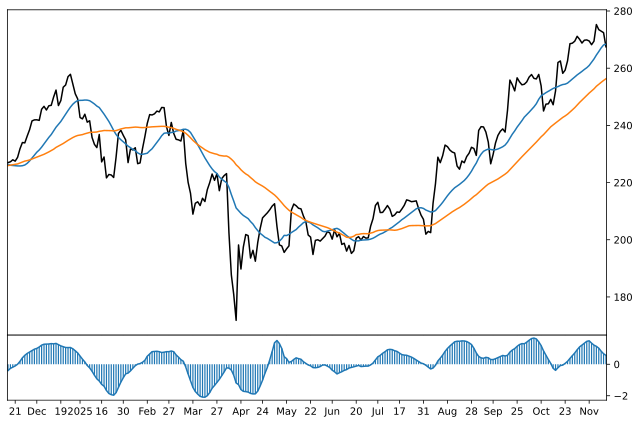

In [ ]:
import matplotlib.pyplot as plt

def plot_prices(prices, max_bars=250):
    prices = prices.tail(max_bars)

    height_ratios = [1.0] + [0.2] 

    fig, axes = plt.subplots(
        nrows=len(height_ratios), sharex=True, tight_layout=True, figsize=(9, 6),
        gridspec_kw=dict(height_ratios=height_ratios, hspace=0)
    )

    # Move y axes to the right
    for ax in axes:
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()

    locator = DTArrayLocator(prices.index)
    formatter = DTArrayFormatter(prices.index)

    #axes[0].set_xticks([], minor=False)
    axes[0].xaxis.set_major_locator(locator)
    axes[0].xaxis.set_major_formatter(formatter)

    # Remove x axis margin
    axes[0].margins(x=0) 

    # fig.autofmt_xdate(which='major', rotation=45, ha='right')

    # Remove minor ticks from the x-axis
    #axes[0].xaxis.minorticks_off()
    #axes[0].set_xticks([], minor=True)

    prices = prices.reset_index()
    xdata = np.asarray(prices.index, float)

    axes[0].plot("close", data=prices, color="black", label="Close")
    axes[0].plot("sma20", data=prices, label="SMA 20")
    axes[0].plot("sma50", data=prices, label="SMA 50")

    axes[1].plot("slope", data=prices, label="Slope")
    axes[1].bar(x=xdata, height="slope", data=prices, width=0.5, label="Slope")

plot_prices(prices, 250)
